**Reading data from yahoo website directly**

In [1]:
!pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
tick1='AMZN'
tick2='AAPL'
tick3='GOOG'
tick4='MSFT'
AMZN=yf.download(tick1,start='2022-06-23',end='2023-06-23')
AAPL=yf.download(tick2,start='2022-06-23',end='2023-06-23')
GOOG=yf.download(tick3,start='2022-06-23',end='2023-06-23')
MSFT=yf.download(tick4,start='2022-06-23',end='2023-06-23')

AMZN.head()
AAPL.head()
GOOG.head()
MSFT.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,255.570007,259.369995,253.630005,258.859985,256.381744,25861400
2022-06-24,261.809998,267.980011,261.720001,267.700012,265.137146,33923200
2022-06-27,268.209991,268.299988,263.279999,264.890015,262.354034,24615100
2022-06-28,263.980011,266.910004,256.320007,256.480011,254.024551,27295500
2022-06-29,257.589996,261.970001,255.759995,260.260010,257.768341,20069800


**Perform Cleaning**

In [2]:
# data has no null values
AMZN.isnull().sum()
AAPL.isnull().sum()
GOOG.isnull().sum()
MSFT.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
#data has no duplicates
AMZN.duplicated().sum()
AAPL.duplicated().sum()
GOOG.duplicated().sum()
MSFT.duplicated().sum()

0

In [4]:
#checking for outliers
AMZN.describe()
AAPL.describe()
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,104.511024,106.052437,103.279216,104.705907,104.705907,2.764222e+07
std,10.872249,10.996743,10.857881,10.981412,10.981412,1.094730e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.090195e+07
50%,102.879997,104.220001,101.860001,103.629997,103.629997,2.491350e+07
75%,112.875000,114.750000,111.387001,112.725750,112.725750,3.128405e+07
max,127.574997,129.550003,125.970001,127.910004,127.910004,9.779860e+07


<AxesSubplot:>

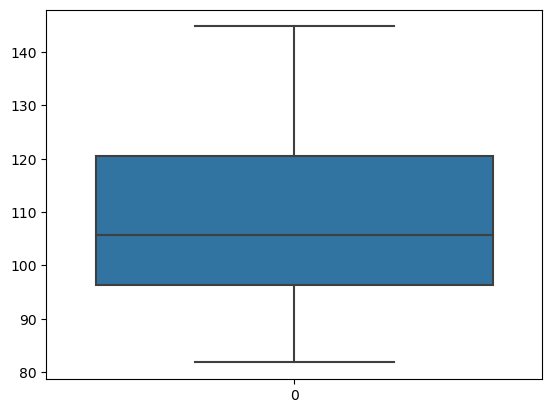

In [5]:
sns.boxplot(data=AMZN['Adj Close']) # no outliers

<AxesSubplot:>

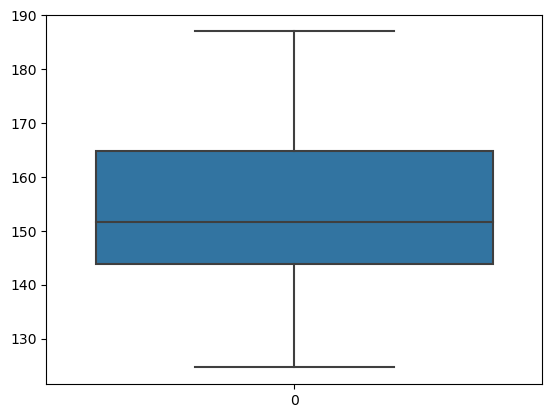

In [6]:
sns.boxplot(data=AAPL['Adj Close']) # no outliers

<AxesSubplot:>

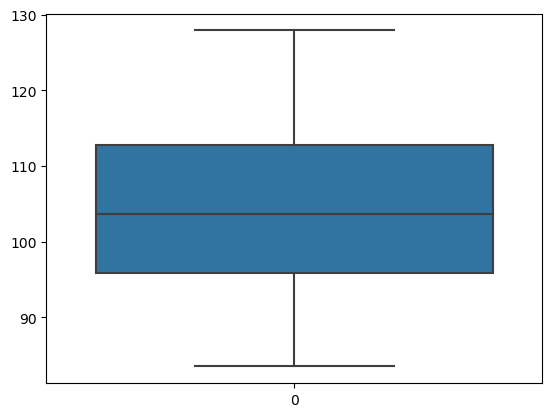

In [7]:
sns.boxplot(data=GOOG['Adj Close']) # no outliers

<AxesSubplot:>

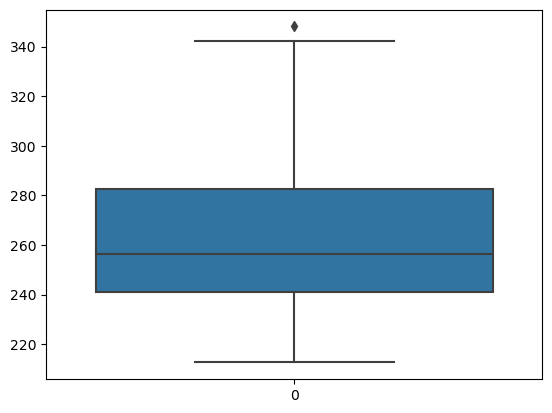

In [8]:
sns.boxplot(data=MSFT['Adj Close']) # no outliers

**Average stock volume traded**

In [9]:
average_volume = AMZN['Volume'].mean()
print(f"Average Daily Trading Volume: {average_volume:.2f}")

Average Daily Trading Volume: 67762827.89


In [10]:
average_volume = MSFT['Volume'].mean()
print(f"Average Daily Trading Volume: {average_volume:.2f}")

Average Daily Trading Volume: 28785428.69


In [11]:
average_volume = GOOG['Volume'].mean()
print(f"Average Daily Trading Volume: {average_volume:.2f}")

Average Daily Trading Volume: 27642223.90


In [12]:
average_volume = AAPL['Volume'].mean()
print(f"Average Daily Trading Volume: {average_volume:.2f}")

Average Daily Trading Volume: 72722390.44


**Candle chart**

In [1]:
from mpl_finance import candlestick_ohlc

C:\Users\Nidhi\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [46]:
import matplotlib.dates as mdates

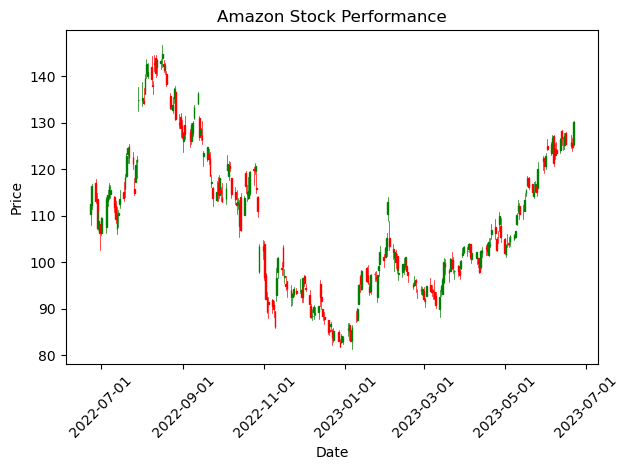

In [47]:
AMZN['Date'] = AMZN.index.map(mdates.date2num)
ohlc = AMZN[['Date', 'Open', 'High', 'Low', 'Close']]

fig, ax = plt.subplots()
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Amazon Stock Performance")
plt.tight_layout()
plt.show()

**Change in stock price over time**

Text(0.5, 1.0, 'Change in stock price over time')

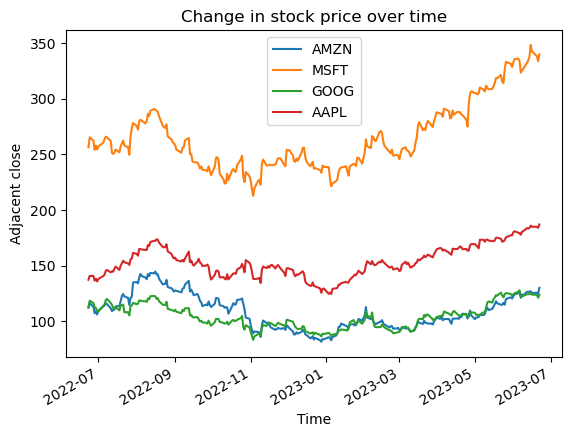

In [13]:
AMZN['Adj Close'].plot()
MSFT['Adj Close'].plot()
GOOG['Adj Close'].plot()
AAPL['Adj Close'].plot()
plt.legend(['AMZN','MSFT','GOOG','AAPL'])
plt.xlabel('Time')
plt.ylabel('Adjacent close')
plt.title('Change in stock price over time')

**Visualize stock's volume to be traded**

Text(0.5, 1.0, 'Change in volume of stock traded over time over time')

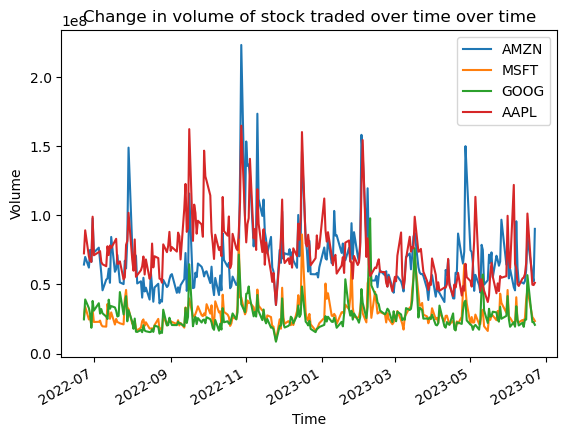

In [14]:
AMZN['Volume'].plot()
MSFT['Volume'].plot()
GOOG['Volume'].plot()
AAPL['Volume'].plot()
plt.legend(['AMZN','MSFT','GOOG','AAPL'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Change in volume of stock traded over time over time')

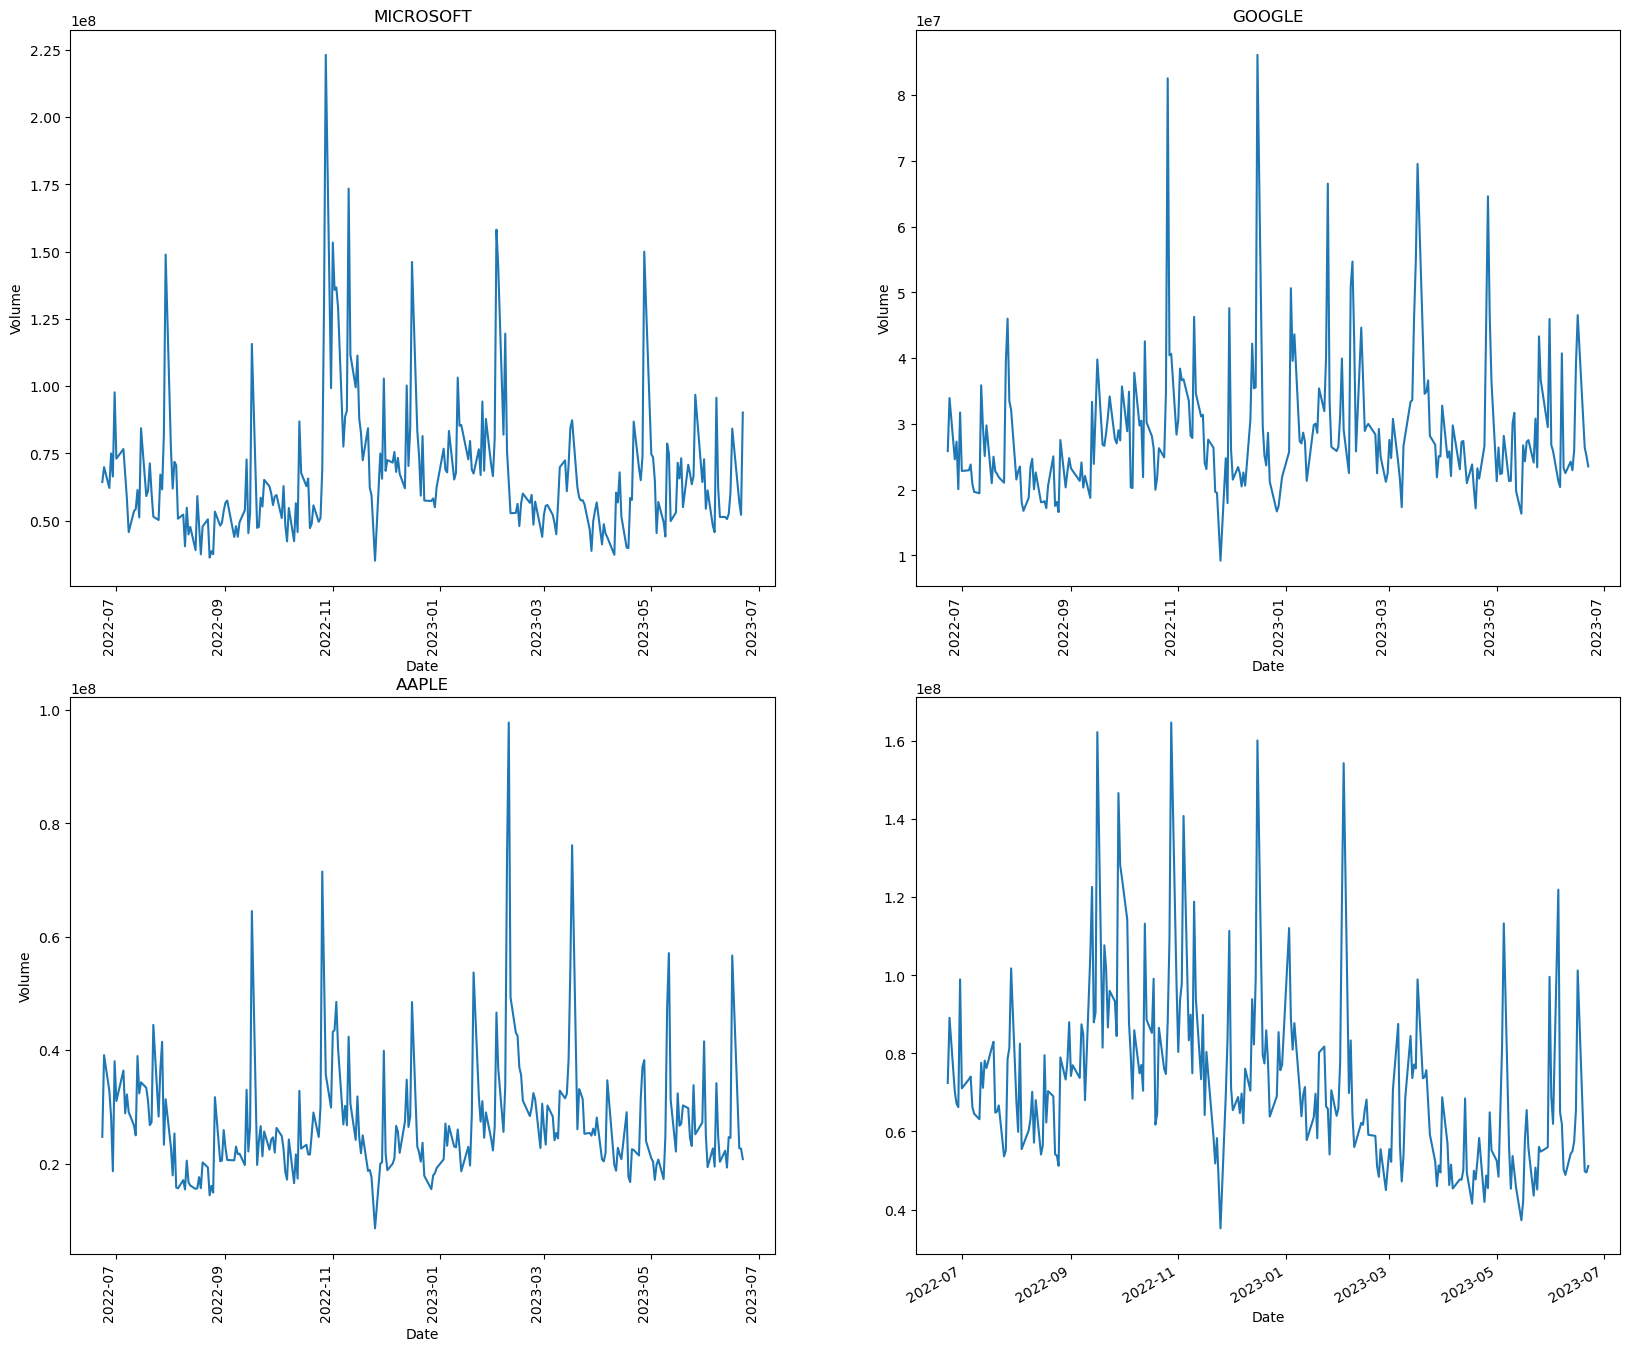

In [44]:
cols=[AMZN,MSFT,GOOG,AAPL]
cols1=['AMAZON','MICROSOFT','GOOGLE','AAPLE']
j=0

plt.figure(figsize=(20,18))
for x in cols:
    plt.xticks(rotation=90)
    plt.title(cols1[j])
    plt.ylabel('Volume')
    plt.subplot(2,2,j+1)
    x['Volume'].plot()
    j=j+1
plt.show()

**Moving average of various stocks**

In [16]:
print('MOVING AVERAGE OF AMAZON FOR 30 DAYS')
AMZN['Adj Close'].rolling(window=30).mean()

MOVING AVERAGE OF AMAZON FOR 30 DAYS


Date
2022-06-23           NaN
2022-06-24           NaN
2022-06-27           NaN
2022-06-28           NaN
2022-06-29           NaN
                 ...    
2023-06-15    117.598001
2023-06-16    118.314334
2023-06-20    118.985001
2023-06-21    119.618334
2023-06-22    120.402667
Name: Adj Close, Length: 251, dtype: float64

In [17]:
print('MOVING AVERAGE OF MICROSOFT FOR 30 DAYS')
MSFT['Adj Close'].rolling(window=30).mean()

MOVING AVERAGE OF MICROSOFT FOR 30 DAYS


Date
2022-06-23           NaN
2022-06-24           NaN
2022-06-27           NaN
2022-06-28           NaN
2022-06-29           NaN
                 ...    
2023-06-15    322.079888
2023-06-16    323.332761
2023-06-20    324.268681
2023-06-21    325.121456
2023-06-22    326.234111
Name: Adj Close, Length: 251, dtype: float64

In [18]:
print('MOVING AVERAGE OF GOOGLE FOR 30 DAYS')
GOOG['Adj Close'].rolling(window=30).mean()

MOVING AVERAGE OF GOOGLE FOR 30 DAYS


Date
2022-06-23           NaN
2022-06-24           NaN
2022-06-27           NaN
2022-06-28           NaN
2022-06-29           NaN
                 ...    
2023-06-15    120.672167
2023-06-16    121.300500
2023-06-20    121.888333
2023-06-21    122.322334
2023-06-22    122.853334
Name: Adj Close, Length: 251, dtype: float64

In [19]:
print('MOVING AVERAGE OF APPLE FOR 30 DAYS')
AAPL['Adj Close'].rolling(window=30).mean()

MOVING AVERAGE OF APPLE FOR 30 DAYS


Date
2022-06-23           NaN
2022-06-24           NaN
2022-06-27           NaN
2022-06-28           NaN
2022-06-29           NaN
                 ...    
2023-06-15    176.231155
2023-06-16    176.876455
2023-06-20    177.265780
2023-06-21    177.622435
2023-06-22    178.138010
Name: Adj Close, Length: 251, dtype: float64

**Daily return average of various stocks**

In [20]:
print('DAILY RETURN AVERAGE OF APPLE')
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
print(AAPL['Daily Return'])

DAILY RETURN AVERAGE OF APPLE
Date
2022-06-23         NaN
2022-06-24    0.024517
2022-06-27    0.000000
2022-06-28   -0.029790
2022-06-29    0.013024
                ...   
2023-06-15    0.011199
2023-06-16   -0.005860
2023-06-20    0.000487
2023-06-21   -0.005675
2023-06-22    0.016525
Name: Daily Return, Length: 251, dtype: float64


In [21]:
print('DAILY RETURN AVERAGE OF GOOGLE')
GOOG['Daily Return']=GOOG['Adj Close'].pct_change()
print(GOOG['Daily Return'])

DAILY RETURN AVERAGE OF GOOGLE
Date
2022-06-23         NaN
2022-06-24    0.051946
2022-06-27   -0.016159
2022-06-28   -0.034736
2022-06-29   -0.002798
                ...   
2023-06-15    0.011336
2023-06-16   -0.013753
2023-06-20   -0.001693
2023-06-21   -0.020912
2023-06-22    0.021524
Name: Daily Return, Length: 251, dtype: float64


In [22]:
print('DAILY RETURN AVERAGE OF MICROSOFT')
MSFT['Daily Return']=MSFT['Adj Close'].pct_change()
print(MSFT['Daily Return'])

DAILY RETURN AVERAGE OF MICROSOFT
Date
2022-06-23         NaN
2022-06-24    0.034150
2022-06-27   -0.010497
2022-06-28   -0.031749
2022-06-29    0.014738
                ...   
2023-06-15    0.031897
2023-06-16   -0.016576
2023-06-20   -0.012503
2023-06-21   -0.013282
2023-06-22    0.018437
Name: Daily Return, Length: 251, dtype: float64


In [23]:
print('DAILY RETURN AVERAGE OF AMAZON')
AMZN['Daily Return']=AMZN['Adj Close'].pct_change()
print(AMZN['Daily Return'])

DAILY RETURN AVERAGE OF AMAZON
Date
2022-06-23         NaN
2022-06-24    0.035752
2022-06-27   -0.027821
2022-06-28   -0.051404
2022-06-29    0.014153
                ...   
2023-06-15    0.005458
2023-06-16   -0.012745
2023-06-20    0.002311
2023-06-21   -0.007553
2023-06-22    0.042618
Name: Daily Return, Length: 251, dtype: float64


**Creating trend column and adding it to the dataframe**

In [24]:
def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slight Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slight Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bull run'
  elif x <= -0.07:
    return 'Bear drop'
AMZN['Trend']= np.zeros(AMZN['Daily Return'].count()+1)
AMZN['Trend']= AMZN['Daily Return'].apply(lambda x:trend(x))

AAPL['Trend']= np.zeros(AAPL['Daily Return'].count()+1)
AAPL['Trend']= AAPL['Daily Return'].apply(lambda x:trend(x))

MSFT['Trend']= np.zeros(MSFT['Daily Return'].count()+1)
MSFT['Trend']= MSFT['Daily Return'].apply(lambda x:trend(x))

GOOG['Trend']= np.zeros(GOOG['Daily Return'].count()+1)
GOOG['Trend']= GOOG['Daily Return'].apply(lambda x:trend(x))

In [25]:
AMZN.head() # trend column added

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
Date,,,,,,,,
2022-06-23,110.389999,113.000000,107.930000,112.440002,112.440002,64345300,NaN,None
2022-06-24,112.379997,116.709999,111.430000,116.459999,116.459999,69867600,0.035752,Slight Positive
2022-06-27,117.089996,117.980003,112.699997,113.220001,113.220001,62133200,-0.027821,Slight Negative
2022-06-28,113.500000,114.849998,107.040001,107.400002,107.400002,74942900,-0.051404,Slight Negative
2022-06-29,107.379997,110.989998,106.910004,108.919998,108.919998,66375300,0.014153,Slight or No change


**Visualize trend frequency in pie chart**

Text(0.5, 1.0, 'AMAZON TREND VALUES')

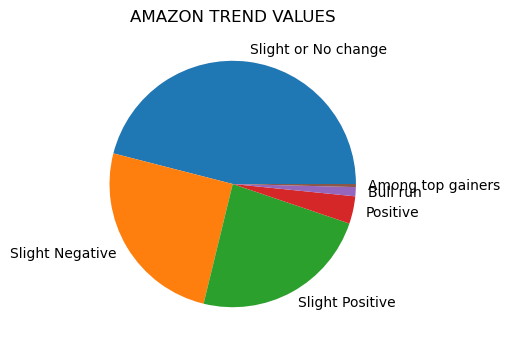

In [26]:
label=AMZN.Trend.value_counts().index
plt.figure(figsize=(4,4))
plt.pie(AMZN['Trend'].value_counts().values,labels=label)
plt.title('AMAZON TREND VALUES')

Text(0.5, 1.0, 'APPLE TREND VALUES')

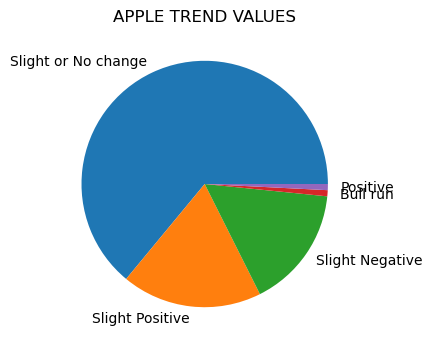

In [27]:
label=AAPL.Trend.value_counts().index
plt.figure(figsize=(4,4))
plt.pie(AAPL['Trend'].value_counts().values,labels=label)
plt.title('APPLE TREND VALUES')

Text(0.5, 1.0, 'MICROSOFT TREND VALUES')

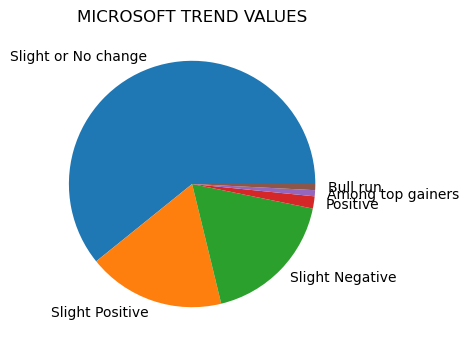

In [28]:
label=MSFT.Trend.value_counts().index
plt.figure(figsize=(4,4))
plt.pie(MSFT['Trend'].value_counts().values,labels=label)
plt.title('MICROSOFT TREND VALUES')

Text(0.5, 1.0, 'GOOGLE TREND VALUES')

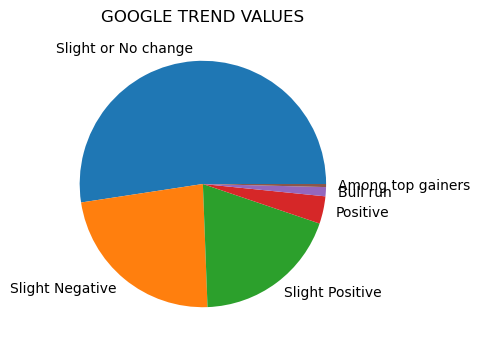

In [29]:
label=GOOG.Trend.value_counts().index
plt.figure(figsize=(4,4))
plt.pie(GOOG['Trend'].value_counts().values,labels=label)
plt.title('GOOGLE TREND VALUES')

**Finding correlation of daily returns**

In [30]:
# creating dataframe with daily return of every company
df1=pd.concat([AAPL['Daily Return'],AMZN['Daily Return'],GOOG['Daily Return'],MSFT['Daily Return']],axis=1)

In [31]:
# changing name of each column
df1.columns=['Apple','Amazon','Google','Microsoft']

In [32]:
df1.head()

,Apple,Amazon,Google,Microsoft
Date,,,,
2022-06-23,NaN,NaN,NaN,NaN
2022-06-24,0.024517,0.035752,0.051946,0.034150
2022-06-27,0.000000,-0.027821,-0.016159,-0.010497
2022-06-28,-0.029790,-0.051404,-0.034736,-0.031749
2022-06-29,0.013024,0.014153,-0.002798,0.014738


<AxesSubplot:>

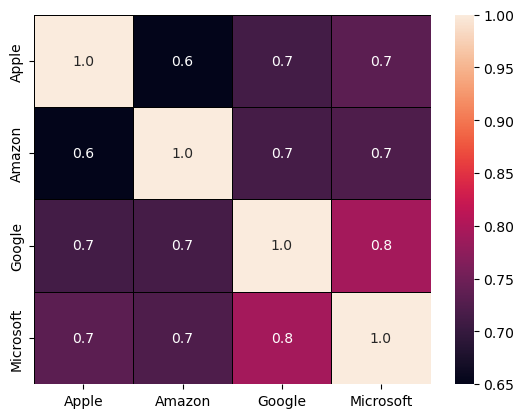

In [33]:
sns.heatmap(df1.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f") 